In [9]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt

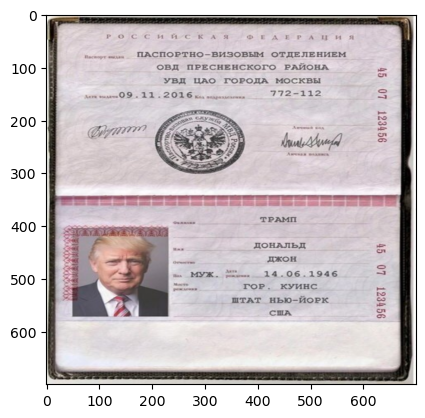

In [13]:
dir_path = 'D:/Jupyter/passport/images/'
file_path = dir_path + '0.jpeg'
img = cv2.imread(file_path)
img = cv2.resize(img, (700, 700))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [312]:
import cv2
import easyocr
import sys
import os
import matplotlib.pyplot as plt

os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

rus = ['А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ё', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф',
       'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я']
rus.extend([i.lower() for i in rus])

block_list = [str(i) for i in range(10)]

def face_detection_on_an_image(image):
    grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = cv2.CascadeClassifier('faces.xml')
    results = faces.detectMultiScale(grey, scaleFactor=1.8, minNeighbors=1)
    results = sorted(results, key=lambda i: i[2] * i[3], reverse=True)
    return list(results[0])

def expand_shape(image, width: int = 400):
    w, h = image.shape[:2]
    coef = width / w
    height = int(h * coef)
    new_shape = (height, width)
    return  cv2.resize(image,new_shape)


def recognize_name_on_a_picture(path):
    photo = cv2.imread(path)
    x, y, w, h = face_detection_on_an_image(photo)
    photo = photo[y - h: y + int(0.8*h), x + w:x + 6*w]
    reader = easyocr.Reader(['ru'])
    gray = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 61, 12)
    words = reader.readtext(mask, min_size=40, add_margin=0.3, allowlist=rus, decoder='wordbeamsearch')
    ar = list(filter(lambda x: len(x) > 2,map(lambda i: i[1], words)))
    name = clearing_of_text_list(ar)[:6]
    return list(map(lambda i: i.lower().title(), name))


def clearing_of_text_list(text):
    res = []
    for word in text:
        k = 0
        for letter in word:
            if letter not in rus:
                k += 1
                word = word.replace(letter, '')
        if k < len(word) / 2:
            res.append(word)
    return res


def adjust_contrast_brightness(image, contrast: float = 1.0, brightness: int = 0):
    brightness += int(round(255 * (1 - contrast) / 2))
    return cv2.addWeighted(image, contrast, image, 0, brightness)


In [313]:
dir_path = 'D:/Jupyter/passport/images/'
file_path = dir_path + '2.jpeg'
recognize_name_on_a_picture(file_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['Мапопникова', 'Евиктория', 'Николаевна', 'Хен', 'Лджоэжъчвб']

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['МАКАРОВ', 'ъ', 'РОМАН', 'ЮРЬЕВИЧ', '', 'МУХ', '', '', 'ДЕР', '']


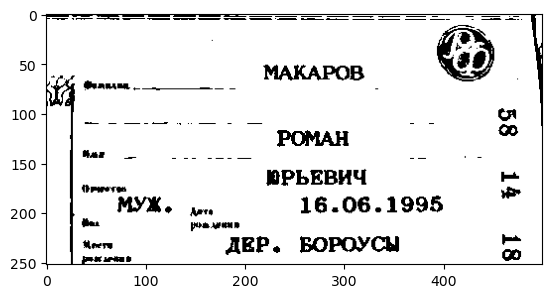

In [307]:
photo = cv2.imread('D:/Jupyter/passport/images/' + '5.jpeg')
x, y, w, h = face_detection_on_an_image(photo)
photo = photo[y - h: y + int(0.8*h), x + w:x + 6*w]
reader = easyocr.Reader(['ru'])
# photo = adjust_contrast_brightness(photo, 1.05, -1)
gray = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
mask = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 61, 12)
words = reader.readtext(mask, min_size=40, add_margin=0.3, allowlist=rus, decoder='wordbeamsearch')
print(list(map(lambda x: x[1] if x[2]>0.3 else '',words)))
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))


In [104]:
import cv2
import easyocr
import sys
import os
import matplotlib.pyplot as plt

os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

rus = ['А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ё', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф',
       'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я']
rus.extend([i.lower() for i in rus])

glasn = ['А', 'Е', 'Ё', 'И', 'О', 'У', 'Ы', 'Э', 'Ю', 'Я']
glasn.extend([i.lower() for i in glasn])

sogl = set(rus)-set(glasn)

def face_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = cv2.CascadeClassifier('faces.xml')
    area = gray.shape[0] * gray.shape[1] 
    results = faces.detectMultiScale(gray, scaleFactor=1.8, minNeighbors=1)
    results = sorted(results, key=lambda i: i[2] * i[3] if i[2]*i[3]<area*0.23 else 0, reverse=True)
    return list(results[0])


def find_name(image, ocr_reader):
    rectangles = ocr_reader.detect(image, width_ths=1, mag_ratio=4)
    return ocr_reader.recognize(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),
                                horizontal_list=rectangles[0][0], free_list=[], allowlist=rus, decoder='wordbeamsearch')

def expand_picture(image, width: int = 400):
    w, h = image.shape[:2]
    coef = width / w
    height = int(h * coef)
    new_shape = (height, width)
    return  cv2.resize(image,new_shape)


def recognize_name(path):
    
    photo = cv2.imread(path)
    x, y, w, h = face_detection(photo)
    photo = expand_picture(photo[y - int(1.1*h): y + int(0.6*h), x + int(1.5*w):x + 6*w])
    photo = adjust_contrast_brightness(photo, 1.12, -2)
    reader = easyocr.Reader(['ru'], gpu=False)
    words = reader.readtext(photo, min_size=40, add_margin=0.3, allowlist=rus, 
                            decoder='wordbeamsearch', contrast_ths=0.5, 
                            adjust_contrast=1.12, text_threshold=0.8, beamWidth=10, link_threshold=0.755)
    ar = list(filter(lambda x: len(x) > 2,map(lambda i: i[1] if i[2]>0.33 else '', words)))
    name = clearing_of_text_list(ar)[:3]
    return list(map(lambda i: i.lower().title(), name))


def clearing_of_text_list(text):
    res = []
    for word in text:
        gl = 0
        sog = 0
        for letter in word:
    
            if letter in glasn:
                gl+=1
            if letter in sogl:
                sog+=1
                
        if 0 < gl  and sog > 0:
            res.append(word)
    return res


def adjust_contrast_brightness(image, contrast: float = 1.0, brightness: int = 0):
    brightness += int(round(255 * (1 - contrast) / 2))
    return cv2.addWeighted(image, contrast, image, 0, brightness)

In [105]:
dir_path = 'D:/Jupyter/passport/images/'
with open('output.txt', 'w+') as file:
    for i in os.listdir(dir_path):
        name = recognize_name(dir_path + i)
        print(name)

Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.


['Трамп', 'Дональд', 'Джон']


Using CPU. Note: This module is much faster with a GPU.


['Халабудина', 'Юлия', 'Алексеевна']


Using CPU. Note: This module is much faster with a GPU.


['Шапошникова', 'Виктория', 'Николаевна']


Using CPU. Note: This module is much faster with a GPU.


['Даймонд', 'Дмитрий', 'Алексеевич']


Using CPU. Note: This module is much faster with a GPU.


['Соколов', 'Андрей', 'Андреешич']


Using CPU. Note: This module is much faster with a GPU.


['Макаров', 'Роман', 'Юрьевич']


Using CPU. Note: This module is much faster with a GPU.


['Васлевския', 'Гркгория', 'Летрович']


Using CPU. Note: This module is much faster with a GPU.


['Имярек', 'Евгений', 'Александрович']


Using CPU. Note: This module is much faster with a GPU.


['Кузеванов', 'Александр', 'Игоревич']
['Дщмакаева', 'Жаннаф', 'Акатольевна']


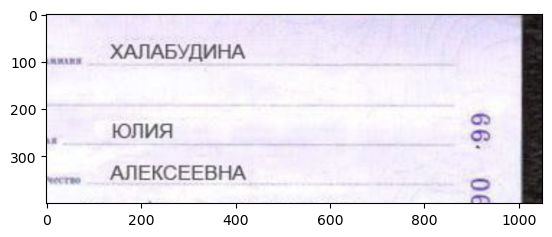

In [93]:
photo = cv2.imread('D:/Jupyter/passport/images/'+'1.jpeg')
x, y, w, h = face_detection(photo)
photo = expand_picture(photo[y - int(1.1*h): y + int(0.6*h), x + int(1.6*w):x + 6*w])
plt.imshow(photo)